<a href="https://colab.research.google.com/github/stharashu/Breast-Cancer-Prediction-using-ML/blob/main/Random_Forest_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from pandas.plotting import scatter_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score

In [ ]:
#For training dataset
data_train = load_breast_cancer()


In [ ]:
# Training dataset
X_train, Y_train = data_train.data, data_train.target

In [ ]:
# loading the data to a data frame
data_frame = pd.DataFrame(data_train.data, columns = data_train.feature_names)

In [ ]:
# adding the 'target' column to the data frame
data_frame['label'] = data_train.target

# print the first 5 rows of the dataframe
data_frame

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
0             0.27760         0.30010              0.14710         0.2419   
1             0.07864         0.08690              0.07017         0.1812   
2             0.15990         0.19740              0.12790         0.2069   
3             0.28390         0.24140              0.10520         0.2597   
4             0.13280         0.19800              0.10430         0.1809   
..                ...             ...                  ...            ...   
564           0.11590         0.24390              0.13890         0.1726   
565           0.10340         0.14400              0.09791         0.1752   
566           0.10230         0.09251              0.05302         0.1590   
567           0.27700         0.35140              0.15200         0.2397   
568           0.04362         0.00000              0.00000         0.1587   

     mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                   0.07871  ...          17.33           184.60      2019.0   
1                   0.05667  ...          23.41           158.80      1956.0   
2                   0.05999  ...          25.53           152.50      1709.0   
3                   0.09744  ...          26.50            98.87       567.7   
4                   0.05883  ...          16.67           152.20      1575.0   
..                      ...  ...            ...              ...         ...   
564                 0.05623  ...          26.40           166.10      2027.0   
565                 0.05533  ...          38.25           155.00      1731.0   
566                 0.05648  ...          34.12           126.70      1124.0   
567                 0.07016  ...          39.42           184.60      1821.0   
568                 0.05884  ...          30.37            59.16       268.6   

     worst smoothness  worst compactness  worst concavity  \
0             0.16220            0.66560           0.7119   
1             0.12380            0.18660           0.2416   
2             0.14440            0.42450           0.4504   
3             0.20980            0.86630           0.6869   
4             0.13740            0.20500           0.4000   
..                ...                ...              ...   
564           0.14100            0.21130           0.4107   
565           0.11660            0.19220           0.3215   
566           0.11390            0.30940           0.3403   
567           0.16500            0.86810           0.9387   
568           0.08996            0.06444           0.0000   

     worst concave points  worst symmetry  worst fractal dimension  label  
0                  0.2654          0.4601                  0.11890      0  
1                  0.1860          0.2750                  0.08902      0  
2                  0.2430          0.3613                  0.08758      0  
3                  0.2575          0.6638                  0.17300      0  
4                  0.1625          0.2364                  0.07678   

In [ ]:
y_train=data_frame.label
#drop_cols=['Unnamed: 32','id','diagnosis']
x_train=data_frame
x_train.head()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                 0.07871  ...          17.33           184.60      2019.0   
1                 0.05667  ...          23.41           158.80      1956.0   
2                 0.05999  ...          25.53           152.50      1709.0   
3                 0.09744  ...          26.50            98.87       567.7   
4                 0.05883  ...          16.67           152.20      1575.0   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   worst symmetry  worst fractal dimension  label  
0          0.4601                  0.11890      0  
1          0.2750                  0.08902      0  
2          0.3613                  0.08758      0  
3          0.6638                  0.17300      0  
4          0.2364                  0.07678      0  

[5 rows x 31 columns]

Benign Tumours is  357
Malignant Tumours is  212


/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


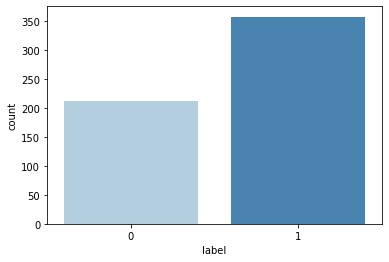

In [ ]:
#No. of benign and malignant in training dataset
ax=sns.countplot(y_train,label='Count',palette='Blues')
B,M=y_train.value_counts()
print("Benign Tumours is ", B)
print("Malignant Tumours is ", M)

In [ ]:
#For testing dataset

from google.colab import files
uploaded = files.upload()
df_test = pd.read_csv('dataset_testing.csv')

Saving dataset_testing.csv to dataset_testing.csv


In [ ]:
df_test. columns


Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [ ]:
df_test.columns = ['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',  'target_variable_name']



In [ ]:
X_test

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0          14.54         27.54           96.73      658.8          0.11390   
1          14.68         20.13           94.74      684.5          0.09867   
2          16.13         20.68          108.10      798.8          0.11700   
3          19.81         22.15          130.00     1260.0          0.09831   
4          13.54         14.36           87.46      566.3          0.09779   
..           ...           ...             ...        ...              ...   
122        13.03         18.42           82.61      523.8          0.08983   
123        14.99         25.20           95.54      698.8          0.09387   
124        13.48         20.82           88.40      559.2          0.10160   
125        13.44         21.58           86.18      563.0          0.08162   
126        10.95         21.35           71.90      371.1          0.12270   

     compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0             0.15950         0.16390              0.07364         0.2303   
1             0.07200         0.07395              0.05259         0.1586   
2             0.20220         0.17220              0.10280         0.2164   
3             0.10270         0.14790              0.09498         0.1582   
4             0.08129         0.06664              0.04781         0.1885   
..                ...             ...                  ...            ...   
122           0.03766         0.02562              0.02923         0.1467   
123           0.05131         0.02398              0.02899         0.1565   
124           0.12550         0.10630              0.05439         0.1720   
125           0.06031         0.03110              0.02031         0.1784   
126           0.12180         0.10440              0.05669         0.1895   

     fractal_dimension_mean  ...  radius_worst  texture_worst  \
0                   0.07077  ...         17.46          37.13   
1                   0.05922  ...         19.07          30.88   
2                   0.07356  ...         20.96          31.48   
3                   0.05395  ...         27.32          30.88   
4                   0.05766  ...         15.11          19.26   
..                      ...  ...           ...            ...   
122                 0.05863  ...         13.30          22.81   
123                 0.05504  ...         14.99          25.20   
124                 0.06419  ...         15.53          26.02   
125                 0.05587  ...         15.93          30.25   
126                 0.06870  ...         12.84          35.34   

     perimeter_worst  area_worst  smoothness_worst  compactness_worst  \
0             124.10       943.2           0.16780            0.65770   
1             123.40      1138.0           0.14640            0.18710   
2             136.80      1315.0           0.17890            0.42330   
3             186.80      2398.0           0.15120            0.31500   
4              99.70       711.2           0.14400            0.17730   
..               ...         ...               ...                ...   
122            84.46       545.9           0.09701            0.04619   
123            95.54       698.8           0.09387            0.05131   
124           107.30       740.4           0.16100            0.42250   
125           102.50       787.9           0.10940            0.20430   
126            87.22       514.0           0.19090            0.26980   

     concavity_worst  concave points_worst  symmetry_worst  \
0            0.70260               0.17120          0.4218   
1            0.29140               0.16090          0.3029   
2            0.47840               0.20730          0.3706   
3            0.53720               0.23880          0.2768   
4            0.23900               0.12880          0.2977   
..               ...                   ...             ...   
122          0.04833               0.05013         

In [ ]:
# Create a new column 'target' and map 'M' to 0 and 'B' to 1
df_test['target_variable_name'] = df_test['diagnosis'].apply(lambda x: 0 if x == 'M' else 1)

# Drop the 'diagnosis' column as it is no longer needed
df_test.drop('diagnosis', axis=1, inplace=True)

In [ ]:

X_test = df_test.drop('target_variable_name', axis=1)
Y_test = df_test['target_variable_name']

In [ ]:
df_test

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          14.54         27.54           96.73      658.8          0.11390   
1          14.68         20.13           94.74      684.5          0.09867   
2          16.13         20.68          108.10      798.8          0.11700   
3          19.81         22.15          130.00     1260.0          0.09831   
4          13.54         14.36           87.46      566.3          0.09779   
..           ...           ...             ...        ...              ...   
122        13.03         18.42           82.61      523.8          0.08983   
123        14.99         25.20           95.54      698.8          0.09387   
124        13.48         20.82           88.40      559.2          0.10160   
125        13.44         21.58           86.18      563.0          0.08162   
126        10.95         21.35           71.90      371.1          0.12270   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
0             0.15950         0.16390              0.07364         0.2303   
1             0.07200         0.07395              0.05259         0.1586   
2             0.20220         0.17220              0.10280         0.2164   
3             0.10270         0.14790              0.09498         0.1582   
4             0.08129         0.06664              0.04781         0.1885   
..                ...             ...                  ...            ...   
122           0.03766         0.02562              0.02923         0.1467   
123           0.05131         0.02398              0.02899         0.1565   
124           0.12550         0.10630              0.05439         0.1720   
125           0.06031         0.03110              0.02031         0.1784   
126           0.12180         0.10440              0.05669         0.1895   

     mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                   0.07077  ...          37.13           124.10       943.2   
1                   0.05922  ...          30.88           123.40      1138.0   
2                   0.07356  ...          31.48           136.80      1315.0   
3                   0.05395  ...          30.88           186.80      2398.0   
4                   0.05766  ...          19.26            99.70       711.2   
..                      ...  ...            ...              ...         ...   
122                 0.05863  ...          22.81            84.46       545.9   
123                 0.05504  ...          25.20            95.54       698.8   
124                 0.06419  ...          26.02           107.30       740.4   
125                 0.05587  ...          30.25           102.50       787.9   
126                 0.06870  ...          35.34            87.22       514.0   

     worst smoothness  worst compactness  worst concavity  \
0             0.16780            0.65770          0.70260   
1             0.14640            0.18710          0.29140   
2             0.17890            0.42330          0.47840   
3             0.15120            0.31500          0.53720   
4             0.14400            0.17730          0.23900   
..                ...                ...              ...   
122           0.09701            0.04619          0.04833   
123           0.09387            0.05131          0.02398   
124           0.16100            0.42250          0.50300   
125           0.10940            0.20430          0.20850   
126           0.19090            0.26980          0.40230   

     worst concave points  worst symmetry  worst fractal dimension  \
0                 0.17120          0.4218                  0.13410   
1                 0.16090          0.3029                  0.08216   
2                 0.20730          0.3706                  0.11420   
3                 0.23880          0.2768                  0.07615   
4                 0.12880          0.2977                  0.07259   
..                    ...    

In [ ]:
y_test=df_test.target_variable_name     #drop_cols=['Unnamed: 32','id','diagnosis']
x_test=df_test
x_test.head()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        14.54         27.54           96.73      658.8          0.11390   
1        14.68         20.13           94.74      684.5          0.09867   
2        16.13         20.68          108.10      798.8          0.11700   
3        19.81         22.15          130.00     1260.0          0.09831   
4        13.54         14.36           87.46      566.3          0.09779   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.15950         0.16390              0.07364         0.2303   
1           0.07200         0.07395              0.05259         0.1586   
2           0.20220         0.17220              0.10280         0.2164   
3           0.10270         0.14790              0.09498         0.1582   
4           0.08129         0.06664              0.04781         0.1885   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                 0.07077  ...          37.13            124.1       943.2   
1                 0.05922  ...          30.88            123.4      1138.0   
2                 0.07356  ...          31.48            136.8      1315.0   
3                 0.05395  ...          30.88            186.8      2398.0   
4                 0.05766  ...          19.26             99.7       711.2   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0            0.1678             0.6577           0.7026                0.1712   
1            0.1464             0.1871           0.2914                0.1609   
2            0.1789             0.4233           0.4784                0.2073   
3            0.1512             0.3150           0.5372                0.2388   
4            0.1440             0.1773           0.2390                0.1288   

   worst symmetry  worst fractal dimension  target_variable_name  
0          0.4218                  0.13410                     0  
1          0.3029                  0.08216                     0  
2          0.3706                  0.11420                     0  
3          0.2768                  0.07615                     0  
4          0.2977                  0.07259                     1  

[5 rows x 31 columns]

Benign Tumours is  76
Malignant Tumours is  51


/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


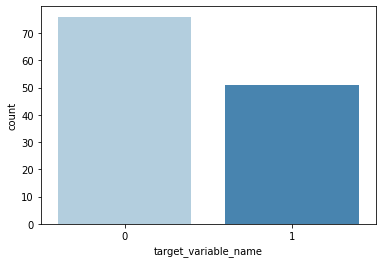

In [ ]:
#No. of benign and malignant in testing dataset
ax=sns.countplot(y_test,label='Count',palette='Blues')
B,M=y_test.value_counts()
print("Benign Tumours is ", B)
print("Malignant Tumours is ", M)


In [ ]:

# Split the data into features and target
X_train = data_frame.drop('label', axis=1)
Y_train = data_frame['label']

In [ ]:
print(X_train)

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mea

In [ ]:
print(Y_train)

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: label, Length: 569, dtype: int64


In [ ]:

# Split the data into features and target
X_test = df_test.drop('target_variable_name', axis=1)
Y_test = df_test['target_variable_name']

In [ ]:
print(X_test)

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          14.54         27.54           96.73      658.8          0.11390   
1          14.68         20.13           94.74      684.5          0.09867   
2          16.13         20.68          108.10      798.8          0.11700   
3          19.81         22.15          130.00     1260.0          0.09831   
4          13.54         14.36           87.46      566.3          0.09779   
..           ...           ...             ...        ...              ...   
122        13.03         18.42           82.61      523.8          0.08983   
123        14.99         25.20           95.54      698.8          0.09387   
124        13.48         20.82           88.40      559.2          0.10160   
125        13.44         21.58           86.18      563.0          0.08162   
126        10.95         21.35           71.90      371.1          0.12270   

     mean compactness  mean concavity  mean concave points  mea

In [ ]:
print(Y_test)

0      0
1      0
2      0
3      0
4      1
      ..
122    1
123    0
124    0
125    0
126    0
Name: target_variable_name, Length: 127, dtype: int64


In [ ]:
data_frame.groupby('label').mean()


mean radius  mean texture  mean perimeter   mean area  mean smoothness  \
label                                                                           
0        17.462830     21.604906      115.365377  978.376415         0.102898   
1        12.146524     17.914762       78.075406  462.790196         0.092478   

       mean compactness  mean concavity  mean concave points  mean symmetry  \
label                                                                         
0              0.145188        0.160775             0.087990       0.192909   
1              0.080085        0.046058             0.025717       0.174186   

       mean fractal dimension  ...  worst radius  worst texture  \
label                          ...                                
0                    0.062680  ...     21.134811      29.318208   
1                    0.062867  ...     13.379801      23.515070   

       worst perimeter   worst area  worst smoothness  worst compactness  \
label                                                                      
0           141.370330  1422.286321          0.144845           0.374824   
1            87.005938   558.899440          0.124959           0.182673   

       worst concavity  worst concave points  worst symmetry  \
label                                                          
0             0.450606              0.182237        0.323468   
1             0.166238              0.074444        0.270246   

       worst fractal dimension  
label                           
0                     0.091530  
1                     0.079442  

[2 rows x 30 columns]

In [ ]:
df_test.groupby('target_variable_name').mean()

mean radius  mean texture  mean perimeter   mean area  \
target_variable_name                                                          
0                       16.451842     21.910921      108.664868  865.009211   
1                       11.549627     17.883529       74.157843  420.611765   

                      mean smoothness  mean compactness  mean concavity  \
target_variable_name                                                      
0                            0.104135          0.144650        0.152717   
1                            0.095868          0.080788        0.048362   

                      mean concave points  mean symmetry  \
target_variable_name                                       
0                                0.081679       0.196263   
1                                0.025884       0.175853   

                      mean fractal dimension  ...  worst radius  \
target_variable_name                          ...                 
0                                   0.063670  ...     19.902368   
1                                   0.064201  ...     12.741902   

                      worst texture  worst perimeter   worst area  \
target_variable_name                                                
0                         29.711184       133.553553  1255.988158   
1                         23.700588        82.236863   508.319608   

                      worst smoothness  worst compactness  worst concavity  \
target_variable_name                                                         
0                             0.147077           0.397223         0.464731   
1                             0.130173           0.177379         0.175742   

                      worst concave points  worst symmetry  \
target_variable_name                                         
0                                 0.177474        0.336704   
1                                 0.072344        0.269675   

                      worst fractal dimension  
target_variable_name                           
0                                    0.095746  
1                                    0.079911  

[2 rows x 30 columns]

In [ ]:
print(X_train.shape, X_test.shape)

(569, 30) (127, 30)


In [ ]:
# Create random forest classifier
rfc = RandomForestClassifier(n_estimators=1, random_state=0)

In [ ]:
# Train the model on the training data
rfc.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=1, random_state=0)

In [ ]:

# Predict class labels of testing set
Y_test_predict = rfc.predict(X_test)

#Predict class labels of training dataset
Y_train_predict = rfc.predict(X_train)

In [ ]:
# Calculate the accuracy score of the model for training data
training_accuracy_rfc = accuracy_score(Y_train, Y_train_predict)
print(f"Training Accuracy: {training_accuracy_rfc*100:.2f}%")

Training Accuracy: 96.31%


In [ ]:
# Calculate the accuracy score of the model/ testing accuracy
testing_accuracy_rfc = accuracy_score(Y_test, Y_test_predict)
print(f"Testing Accuracy: {testing_accuracy_rfc*100:.2f}%")

Testing Accuracy: 96.06%


In [ ]:
# Generate a classification report for testing data
cr = classification_report(Y_test, Y_test_predict)
print("Classification Report:\n", cr)

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.95      0.97        76
           1       0.93      0.98      0.95        51

    accuracy                           0.96       127
   macro avg       0.96      0.96      0.96       127
weighted avg       0.96      0.96      0.96       127



Confusion Matrix:
 [[72  4]
 [ 1 50]]


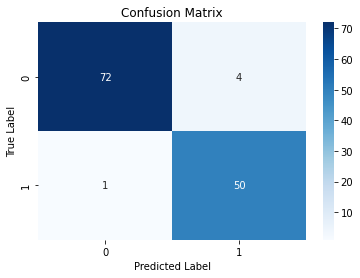

In [ ]:
# Generate a confusion matrix for training data
cm = confusion_matrix(Y_test, Y_test_predict)
print("Confusion Matrix:\n", cm)

# Plot a confusion matrix using seaborn
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
input_data = np.array([17.99,10.38,122.8,1001,0.1184,0.2776,0.3001,0.1471,0.2419,0.07871,1.095,0.9053,8.589,153.4,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189])
# Reshape the input data to a 2D array with a single row and the same number of columns as the training data
input_data_2D = input_data.reshape(1, -1)

# Predict the class label for the input data using the trained random forest classifier
prediction = rfc.predict(input_data_2D)

# Print the predicted class label
if prediction == 0:
    print("The input data is classified as Malignant.")
else:
    print("The input data is classified as Benign.")

The input data is classified as Malignant.


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
input_data = np.array([13.08, 15.71, 85.63, 520.0, 0.1075, 0.127, 0.04568, 0.0311, 0.1967, 0.06811, 0.1852, 0.7477, 1.383, 14.67, 0.004097, 0.01898, 0.01698, 0.00649, 0.01678, 0.002425, 14.5, 20.49, 96.09, 630.5, 0.1312, 0.2776, 0.189, 0.07283, 0.3184, 0.08183])

# Reshape the input data to a 2D array with a single row and the same number of columns as the training data
input_data_2D = input_data.reshape(1, -1)

# Predict the class label for the input data using the trained random forest classifier
prediction = rfc.predict(input_data_2D)

# Print the predicted class label
if prediction == 0:
    print("The input data is classified as malignant.")
else:
    print("The input data is classified as benign.")

The input data is classified as benign.


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


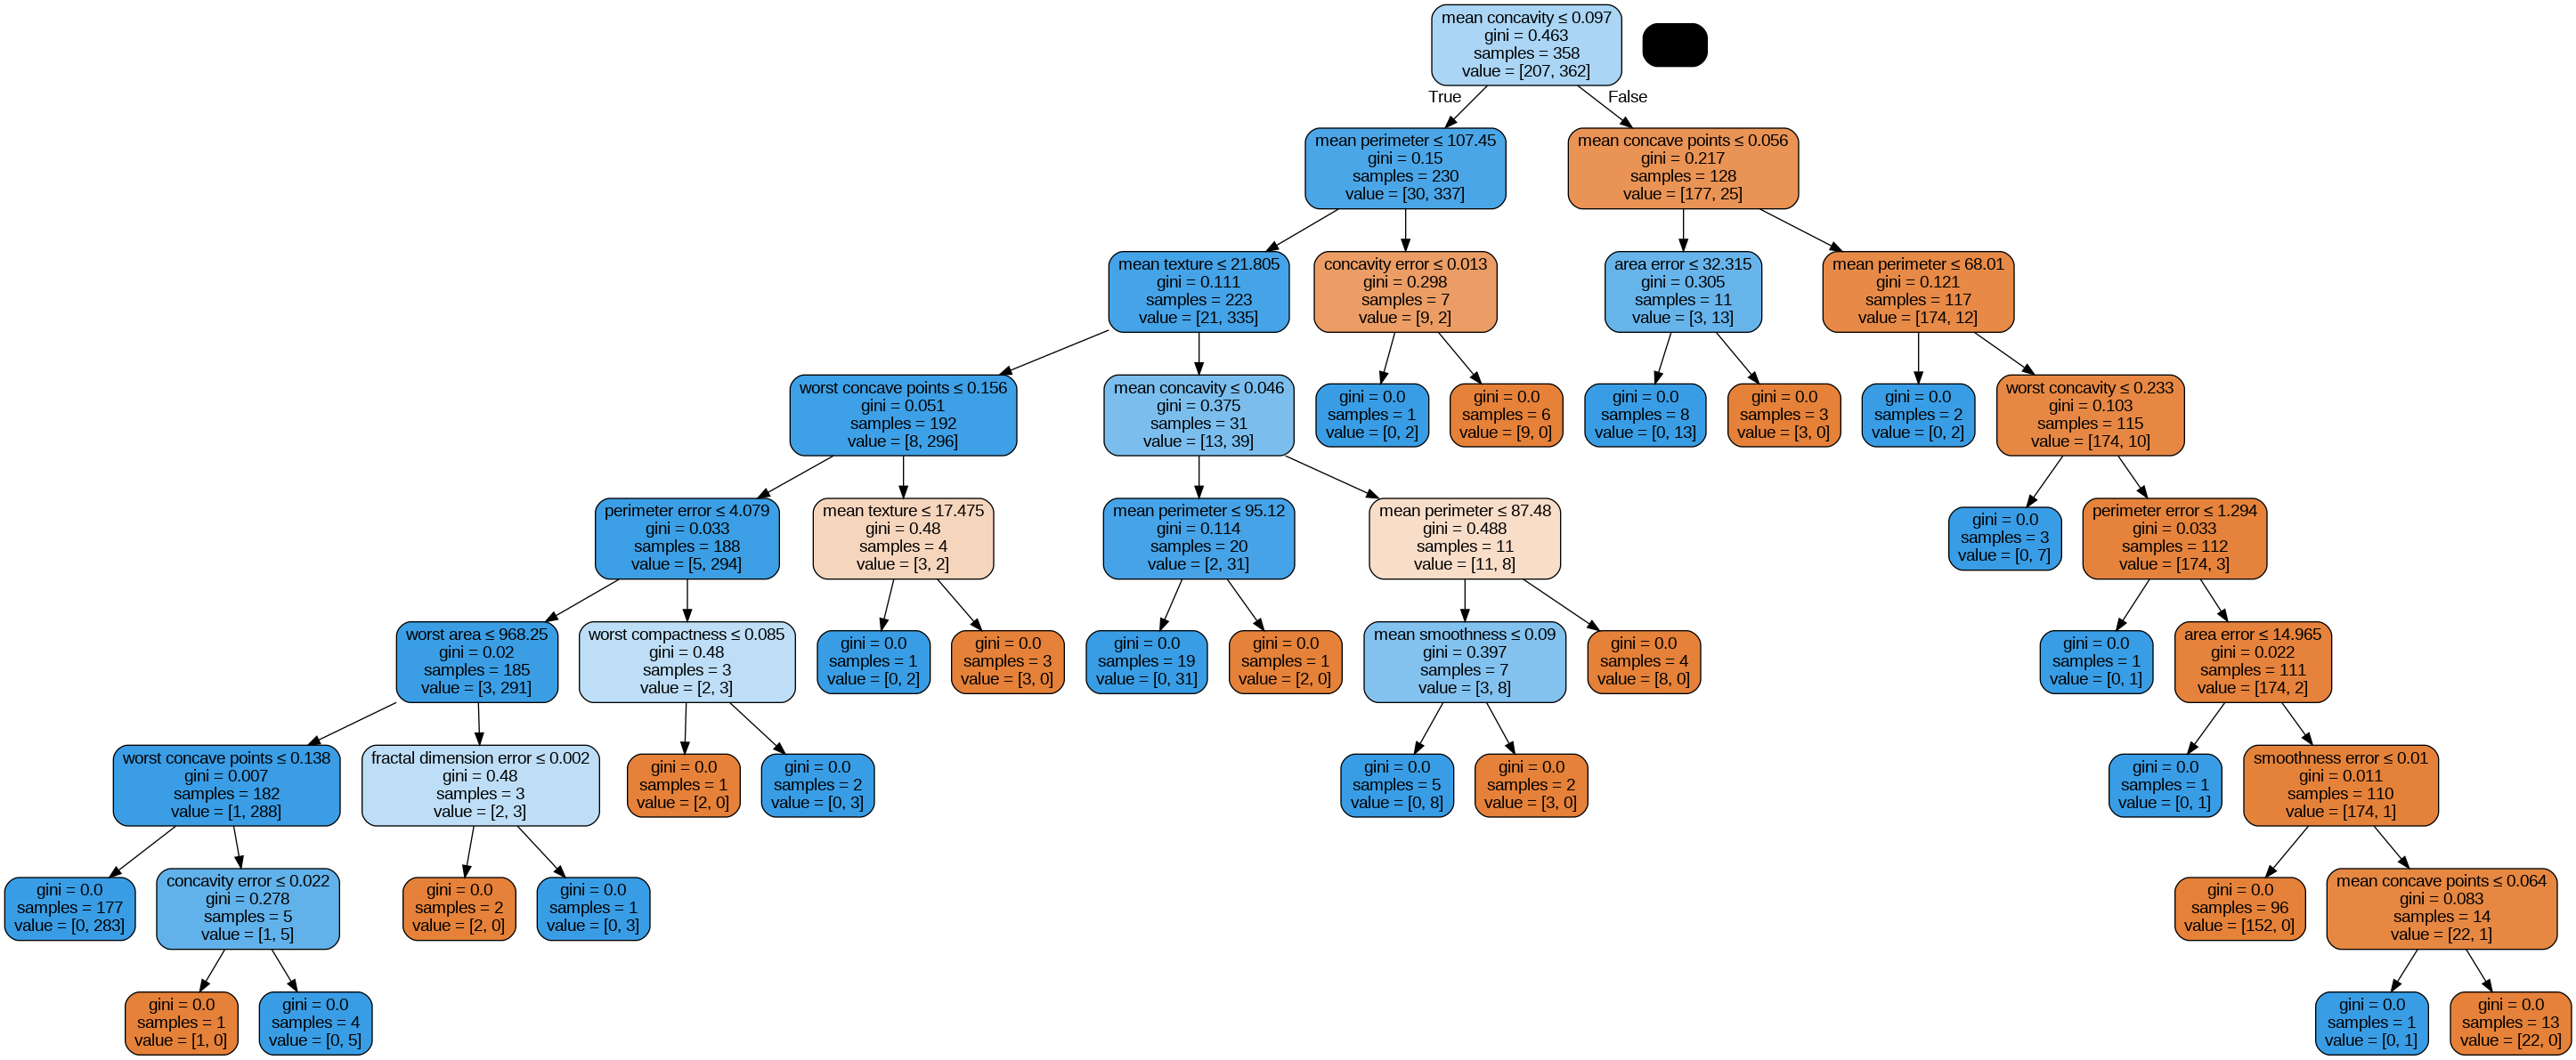

In [ ]:
# Tree Visualization
from sklearn.tree import export_graphviz
from IPython.display import Image
from subprocess import call
from six import StringIO
import pydot

# Create DOT data
dot_data = StringIO()
export_graphviz(rfc.estimators_[0], out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True, feature_names=data_train.feature_names)

# Draw graph
graph = pydot.graph_from_dot_data(dot_data.getvalue())

# Save graph as PNG image
graph[0].write_png('tree.png')
Image(filename = 'tree.png')

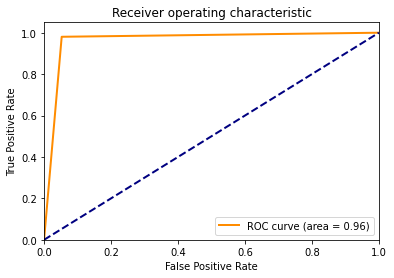

In [ ]:
from sklearn.metrics import roc_curve, auc
# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(Y_test, Y_test_predict)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


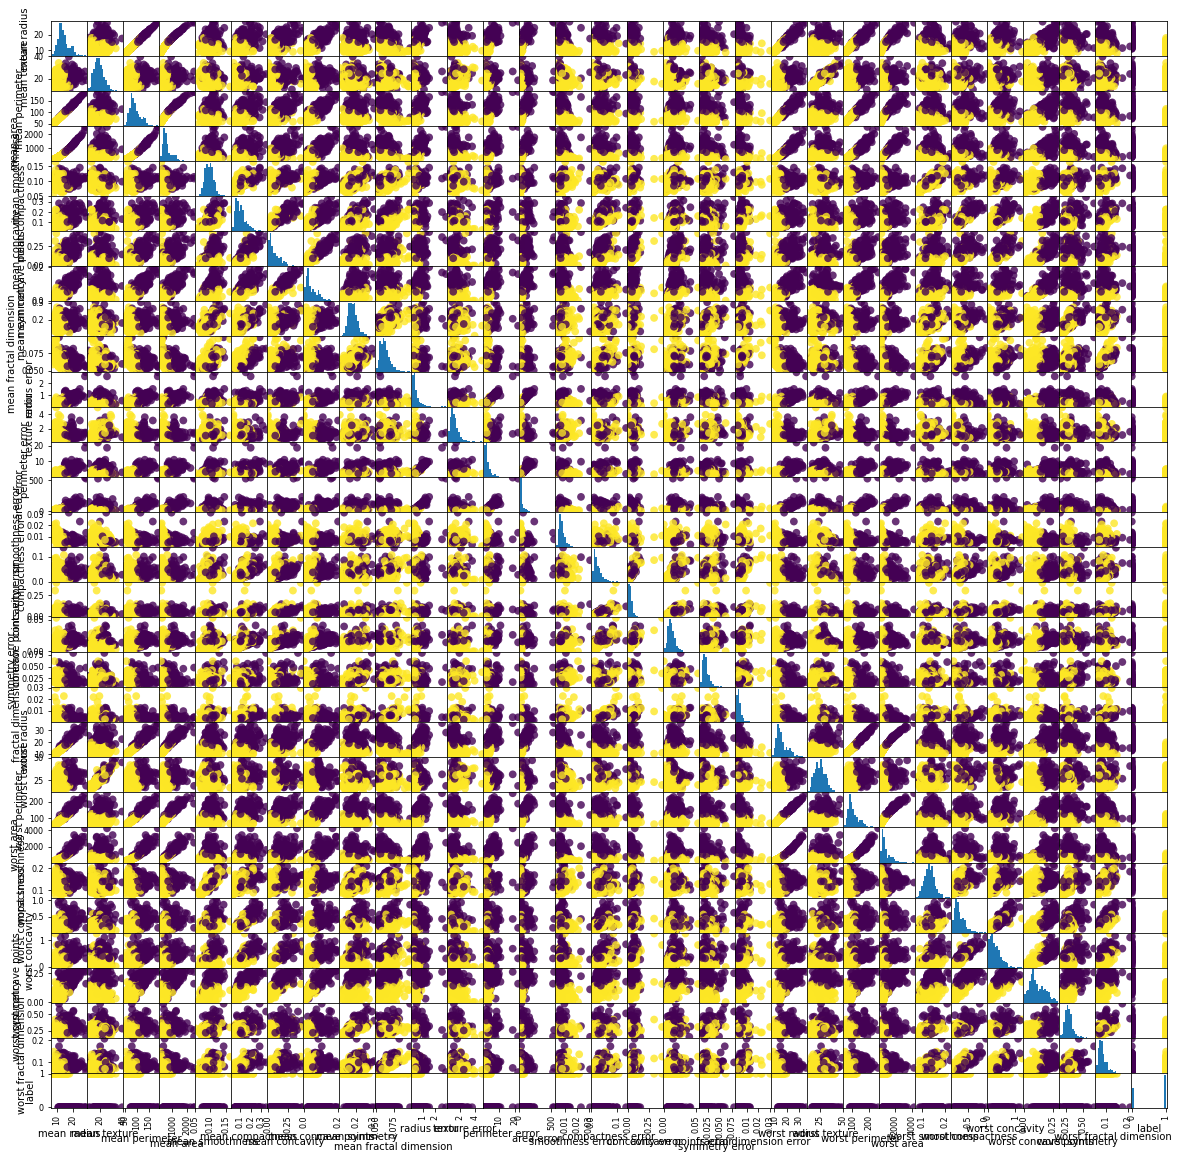

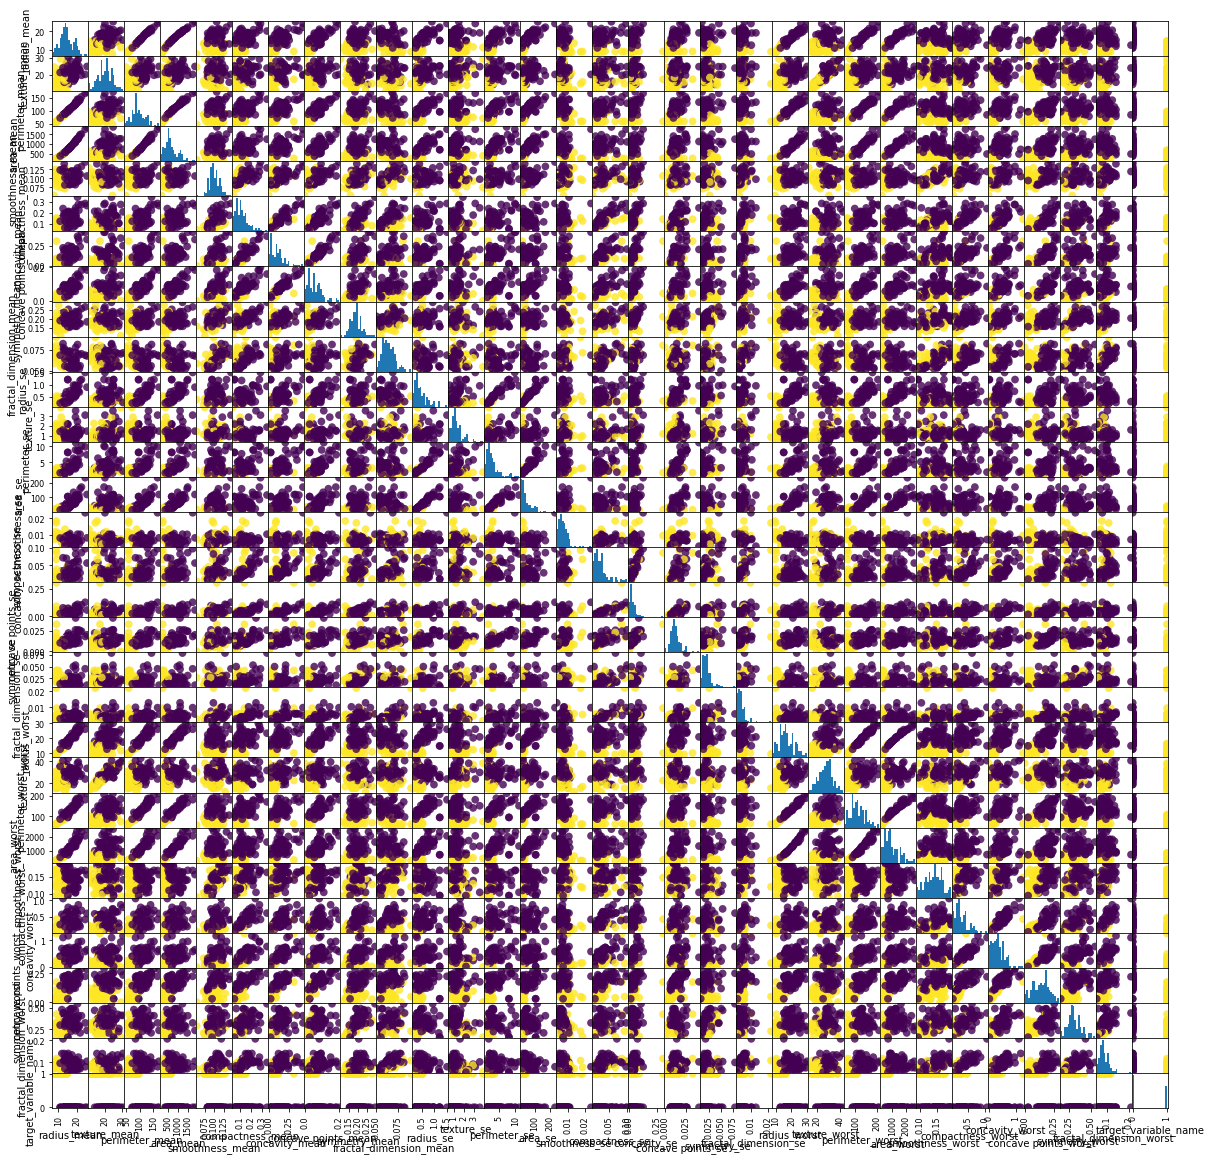

In [ ]:
# Visualize the dataset using scatter matrix
scatter_matrix(data_frame, c=y_train, figsize=(20, 20), marker='o', hist_kwds={'bins': 20}, s=60, alpha=.8)
plt.show()

scatter_matrix(df_test, c=y_test, figsize=(20, 20), marker='o', hist_kwds={'bins': 20}, s=60, alpha=.8)
plt.show()
